# Project 2
The data that I chose for Project 2 is called Crash_Reporting_Drivers_Data, which I chose due to the various information provided in the dataset, which would be a good dataset for hypotheses and questions. 



I found this dataset through Data.gov.

Description: This dataset provides information on motor vehicle operators (drivers) involved in traffic collisions occurring on county and local roadways. The dataset reports details of all traffic collisions occurring on county and local roadways within Montgomery County, Maryland. This dataset shows the collision data recorded and the drivers involved.



This data is collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police, and reported by the Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police.



Linked: https://catalog.data.gov/dataset/crash-reporting-drivers-data

Size of data: 86.2 MB

Rows: 171950

Columns: 43



Hypotheses/Questions:

- Higher number of crashes during the night than morning.
- Are certain types of collisions (e.g., sideswipe, rear-end) more prevalent on wet or icy roads compared to dry roads?
- Is there a significant difference in the number of crashes on clear days compared to rainy or snowy days?
- Is there a significant difference in the number of crashes on clear days compared to rainy or snowy days?
- Have vehicle damage in crashes has decreased over the years?
- Higher number of crashes occur in higher speed limit zones and are likely to involve vehicles moving at constant speeds

### Importing libraries and Loading the Data 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv', low_memory=False) # Loading the data

### Understanding the Data
- `head` and `tail`: to look at the top and bottom rows
- `shape`: shows rows and columns 
- `dtype`: shows the data type that each column is
- `columns`: shows the names of all the columns 

In [72]:
df.head() # Shows Top 5 rows of the data set

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,5/31/19 15:00,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,...,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,EJ78850038,230034791,Gaithersburg Police Depar,Property Damage Crash,7/21/23 17:59,Maryland (State),FREDERICK RD,Unknown,WATKINS MILL RD,NaN,...,40,No,No,2011,GMC,TK,NO MISUSE,39.159264,-77.219025,"(39.1592635, -77.21902483)"
2,MCP2009002G,230034583,Montgomery County Police,Property Damage Crash,7/20/23 15:10,Maryland (State),GEORGIA AVE,Maryland (State),NORBECK RD,NaN,...,35,No,No,2019,FORD,F150,NO MISUSE,39.109535,-77.075806,"(39.10953506, -77.07580619)"
3,MCP3201004C,230035036,Montgomery County Police,Property Damage Crash,7/23/23 12:10,County,CRYSTAL ROCK DR,County,WATERS LANDING DR,NaN,...,40,No,No,2016,KIA,SW,NO MISUSE,39.190149,-77.266766,"(39.19014917, -77.26676583)"
4,MCP23290028,230035152,Montgomery County Police,Property Damage Crash,7/24/23 6:10,County,MONTGOMERY VILLAGE AVE,County,CENTERWAY RD,NaN,...,35,No,No,2016,TOYT,TK,NO MISUSE,39.172558,-77.203745,"(39.17255801, -77.20374546)"


In [73]:
df.shape # Number of rows and columns in the data set

(172105, 43)

In [74]:
df.dtypes # Shows the columns and the data type of each

Report Number                      object
Local Case Number                  object
Agency Name                        object
ACRS Report Type                   object
Crash Date/Time                    object
Route Type                         object
Road Name                          object
Cross-Street Type                  object
Cross-Street Name                  object
Off-Road Description               object
Municipality                       object
Related Non-Motorist               object
Collision Type                     object
Weather                            object
Surface Condition                  object
Light                              object
Traffic Control                    object
Driver Substance Abuse             object
Non-Motorist Substance Abuse       object
Person ID                          object
Driver At Fault                    object
Injury Severity                    object
Circumstance                       object
Driver Distracted By              

In [75]:
df.columns # Name of the columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

### Preparing the Data 

- Dropping missing irrelevant rows/columns
- Identifying if duplicate columns are present
- Renaming columns
- Corecting data types

In [76]:
# Dropping the columns that we are not using in this project
df = df.drop(['Parked Vehicle', 'Local Case Number', 'Off-Road Description', 'Related Non-Motorist', 'Municipality', 'Non-Motorist Substance Abuse', 'Vehicle Going Dir', 'Driverless Vehicle', 'Report Number', 'Latitude', 'Longitude'], axis = 1)

Congregating 'Crash Date/Time' column into two different columns: 'Date' and 'Time'

In [77]:
df['Date'] = df['Crash Date/Time'].apply(lambda x: x.split(' ')[0] if pd.notnull(x) else None)
df['Time'] = df['Crash Date/Time'].apply(lambda x: x.split(' ')[1] if pd.notnull(x) and len(x.split(' ')) > 1 else None)

The lambda function splits the string for each entry in "Crash Date/Time and the if statement error handles so that if the formatting has issue, the code will still run.  

In [78]:
df.head() # check if we have the two new columns 

,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Collision Type,Weather,Surface Condition,...,Vehicle Movement,Vehicle Continuing Dir,Speed Limit,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Location,Date,Time
0,Montgomery County Police,Property Damage Crash,5/31/19 15:00,NaN,NaN,NaN,NaN,OTHER,CLEAR,NaN,...,PARKING,North,15,2004,HONDA,TK,UNKNOWN,"(39.15004368, -77.06308884)",5/31/19,15:00
1,Gaithersburg Police Depar,Property Damage Crash,7/21/23 17:59,Maryland (State),FREDERICK RD,Unknown,WATKINS MILL RD,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,...,MAKING LEFT TURN,East,40,2011,GMC,TK,NO MISUSE,"(39.1592635, -77.21902483)",7/21/23,17:59
2,Montgomery County Police,Property Damage Crash,7/20/23 15:10,Maryland (State),GEORGIA AVE,Maryland (State),NORBECK RD,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,...,ACCELERATING,North,35,2019,FORD,F150,NO MISUSE,"(39.10953506, -77.07580619)",7/20/23,15:10
3,Montgomery County Police,Property Damage Crash,7/23/23 12:10,County,CRYSTAL ROCK DR,County,WATERS LANDING DR,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,...,STARTING FROM LANE,East,40,2016,KIA,SW,NO MISUSE,"(39.19014917, -77.26676583)",7/23/23,12:10
4,Montgomery County Police,Property Damage Crash,7/24/23 6:10,County,MONTGOMERY VILLAGE AVE,County,CENTERWAY RD,HEAD ON LEFT TURN,CLOUDY,DRY,...,MAKING LEFT TURN,West,35,2016,TOYT,TK,NO MISUSE,"(39.17255801, -77.20374546)",7/24/23,6:10


In [79]:
df['Date'] = pd.to_datetime(df['Date']) # Converting the date into a cleaner format 
df['Date']

/var/folders/b1/cm4yxg255jd244j8f00d_sbc0000gn/T/ipykernel_64774/823777001.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date']) # Converting the date into a cleaner format


0        2019-05-31
1        2023-07-21
2        2023-07-20
3        2023-07-23
4        2023-07-24
            ...    
172100   2016-03-01
172101   2017-07-19
172102   2020-11-23
172103   2019-11-23
172104   2015-01-21
Name: Date, Length: 172105, dtype: datetime64[ns]

In [80]:
def time_of_day(time_str):
    """
    Convert a time string into a categorical descriptor of the time of day.
    
    This function categorizes the time of a day into one of four categories:
    'Morning', 'Afternoon', 'Evening', and 'Night'. If the time is not 
    provided or null, it returns None.

    Args:
        time_str (str): A string representation of time in the format 'HH:MM'.

    Returns:
        str: A string indicating the time of day ('Morning', 'Afternoon', 
             'Evening', 'Night') or None if time_str is null.
    """    
    if pd.isnull(time_str):
        return None
    hour = int(time_str.split(':')[0])  # Extract the hour part and convert to integer
    # Categorizing time data into: Morning, Afternoon, Evening and Night
    if 6 <= hour < 12: 
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'
    
df['Crash Time'] = df['Time'].apply(time_of_day)
print(df['Crash Time'])


0         Afternoon
1         Afternoon
2         Afternoon
3         Afternoon
4           Morning
            ...    
172100      Morning
172101    Afternoon
172102      Morning
172103      Evening
172104      Morning
Name: Crash Time, Length: 172105, dtype: object


## Testing Hypothesis through Visualizations and Analysis

### 1. Higher number of crashes during the night than morning.
I hypothesize that there will be more crashes during the night due to lower visibility and people might be driving faster during night times 

In [81]:
time_of_day_counts = df['Crash Time'].value_counts()

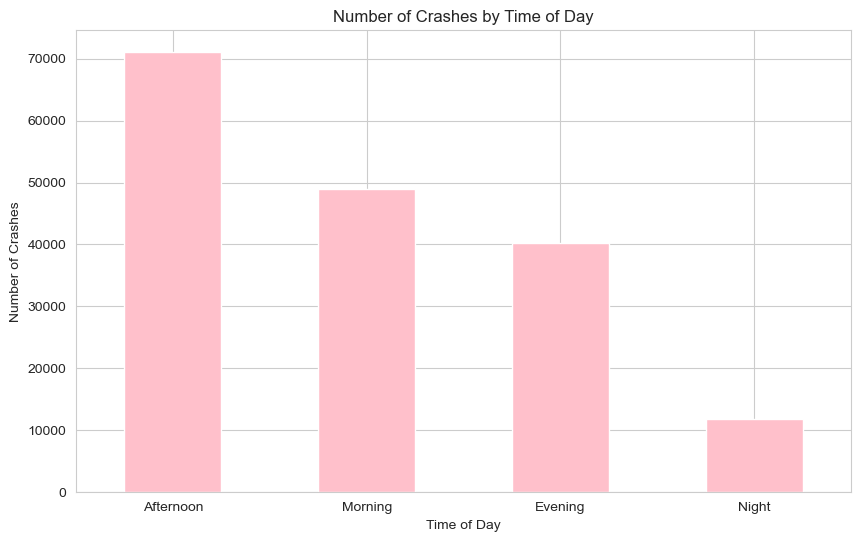

In [82]:
# Plotting the bar chart
time_of_day_counts.plot(kind='bar', color='pink', figsize=(10, 6))

plt.title('Number of Crashes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=360)

# Display the plot
plt.show()

This plot rejects the hypothesis as most of the crashes that have happened are during afternoon and morning this can be explained by a few reasons: 
- Higher traffic during the day, as more people are commuting to work, school and other places. 
- People might be more confident during the day, causing them to be more distracted
- The sun glare and lower visibility can explain the afternoon and evening crashes

### 2. Are certain types of collisions (e.g., sideswipe, rear-end) more prevalent on wet or icy roads compared to dry roads?

I hypothesize that most types of collisions will occur when the weather conditions are adverse and the roads are ice and wet as compared to dry roads. This could be because of slippery conditions, lower visibility, less control of the vehicle from the driver. 

In [83]:
collision_data = df[df['Collision Type'].notnull() & df['Surface Condition'].notnull()] # Selecting not null values from each column

In [84]:
common_surfaces = ['WET', 'DRY', 'ICY', 'SNOW'] # Selecting the type of surfaces in the data
collision_data = collision_data[collision_data['Surface Condition'].isin(common_surfaces)]

In [85]:
# Group the data by 'Surface Condition' and 'Collision Type', count the occurrences of each combination,
# and pivot the 'Collision Type' to create a dataframe with surface conditions as rows and collision types as columns
collision_surface_count = collision_data.groupby(['Surface Condition', 'Collision Type']).size().unstack(fill_value=0)

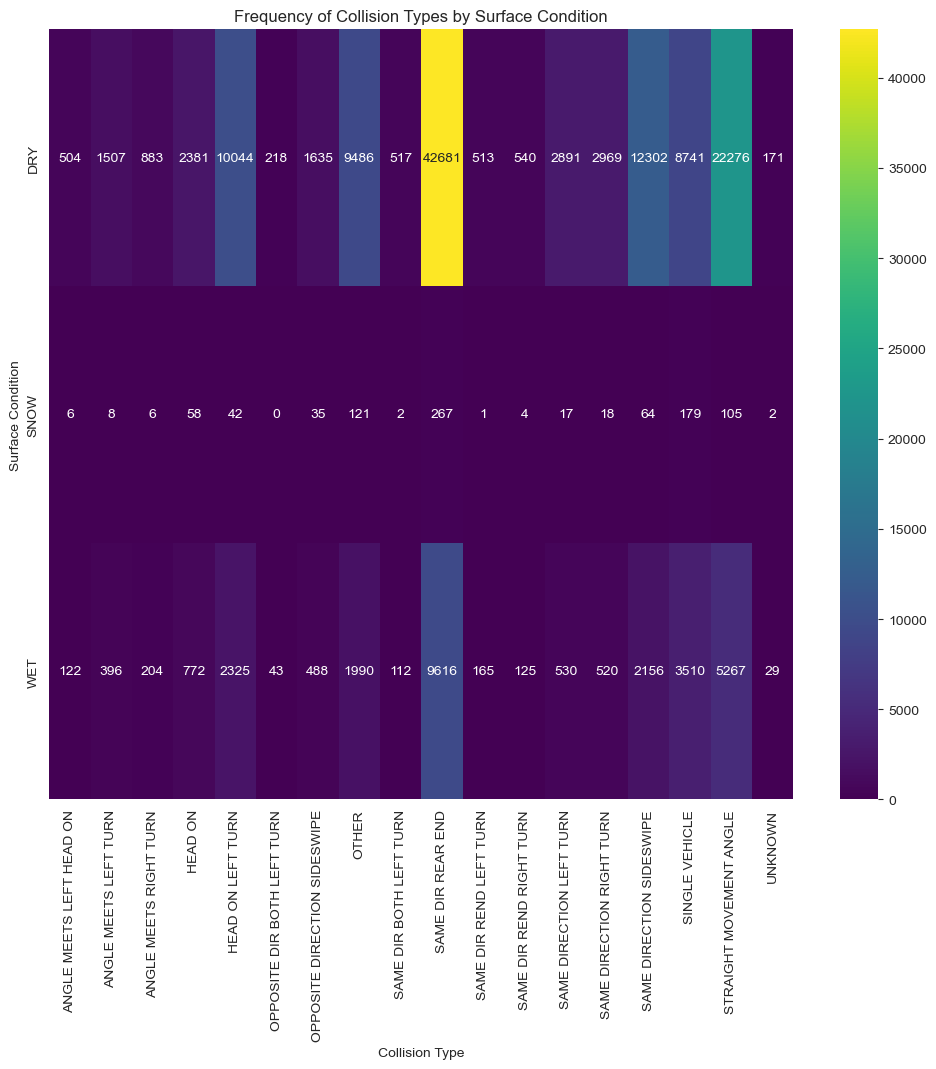

In [86]:
plt.figure(figsize=(12,10)) 
sns.heatmap(collision_surface_count, annot= True, fmt= 'd', cmap='viridis') 
# annot = turns on annotations within the squares of the heatmap
# fmt = values formatted as integers (decimal)
# cmap = color palatte 
plt.title('Frequency of Collision Types by Surface Condition')
plt.xlabel('Collision Type')
plt.ylabel('Surface Condition')
plt.xticks(rotation=90)
plt.show()

https://seaborn.pydata.org/generated/seaborn.heatmap.html

The hypothesis was rejected as most crashes occured on a dry day and the most common type of collision type was same direction rear ending (42681). This could be due to multiple factors including: 
- There are more vehicles on the road during dry conditions, increasing the likelihood of collisions
- On dry days, drivers might be more likely to become complacent and less cautious. 

The least number of crashes occured on snowy days. 

### 3. Is there a significant difference in the number of crashes on clear days compared to rainy or snowy days?
I hypothesize that the number of crashes on a rainy/snowy day would be higher than number of crashes on a clear day. This is due to slippery conditions, and reduced visibility.

In [87]:
weather_data = df[df['Weather'].notnull()] # Selecting non null values 

In [88]:
weather_data_values = ['CLEAR','CLOUDY','RAINING']
weather_data = weather_data[weather_data['Weather'].isin(weather_data_values)] # Select the common values from weather and weather data values

In [89]:
weather_counts = weather_data['Weather'].value_counts()

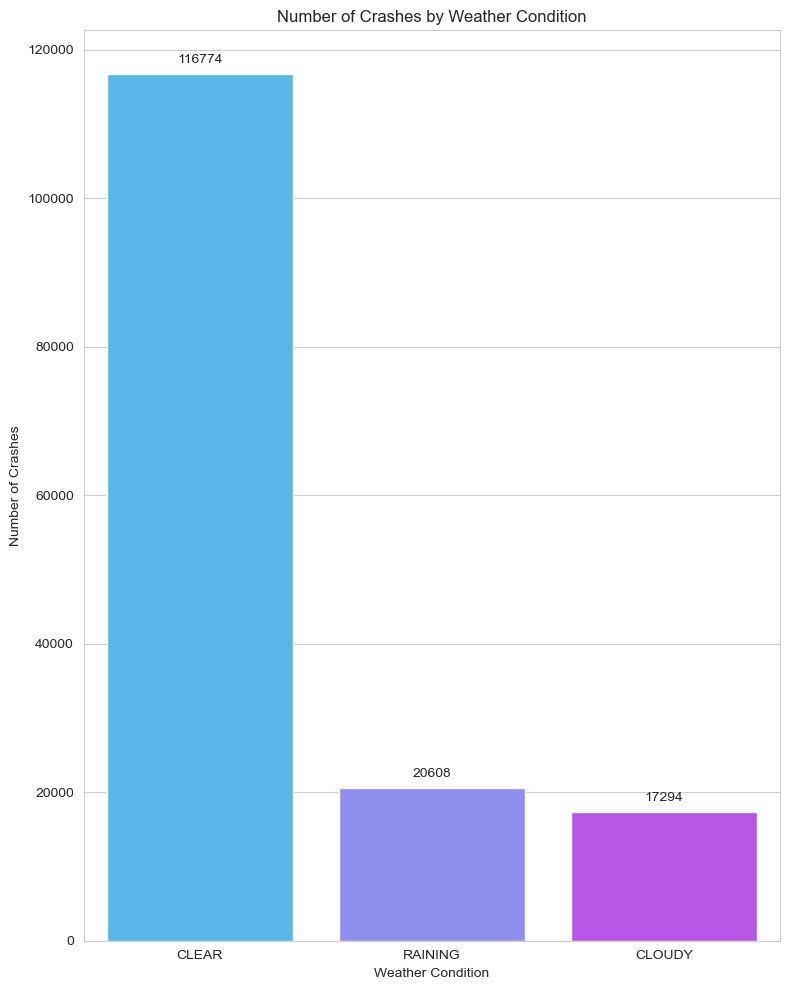

In [90]:
plt.figure(figsize=(8,10))
barplot = sns.barplot(x = weather_counts.index, y = weather_counts.values, palette='cool')
plt.title('Number of Crashes by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Crashes')

# Loop over the bars in the barplot and annotate with the number count
for p in barplot.patches:
    barplot.annotate(format(p.get_height(),'.0f'), # No decimals, only integers
    (p.get_x() + p.get_width()/2.,p.get_height()), # Position for the annotation
    ha = 'center', #Center the text horizontally
    va = 'center', # and vertically
    xytext = (0,10),
    textcoords = 'offset points') # Use offset points for positioning

plt.tight_layout()
plt.show()

The hypothesis was rejected as most crashes occured on a clear day (116774). This could be due to multiple factors including:

- There are more vehicles on the road during dry conditions, increasing the likelihood of collisions
- On dry days, drivers might be more likely to become complacent and less cautious.
- On clear days, sun glare can be a significant problem, especially during sunrise and sunset hours, potentially leading to more accidents.

The least number of crashes occured on cloudy days (17294) and raining days (20608)

### 4. Is there a trend in months and seasonality of the crashes through the years 

I hypothesize that there will be an increase in crashes through the years with a decrease during the covid pandemic in 2020-2022 and increased crashes during holiday or summer seasons during the years. 

In [91]:
import statsmodels.api as sm

In [92]:
sns.set_style('whitegrid') # For the background grid 

In [93]:
df_date = df.dropna(subset=['Date'])
df_date.set_index('Date', inplace = True)

In [94]:
monthly_crashes = df_date.resample('M').size()

In [95]:
decomposition = sm.tsa.seasonal_decompose(monthly_crashes, model='addictive') # Decompose the time series into trend, seasonal, and residual components


Text(0.5, 0, 'Years (2015-2024)')

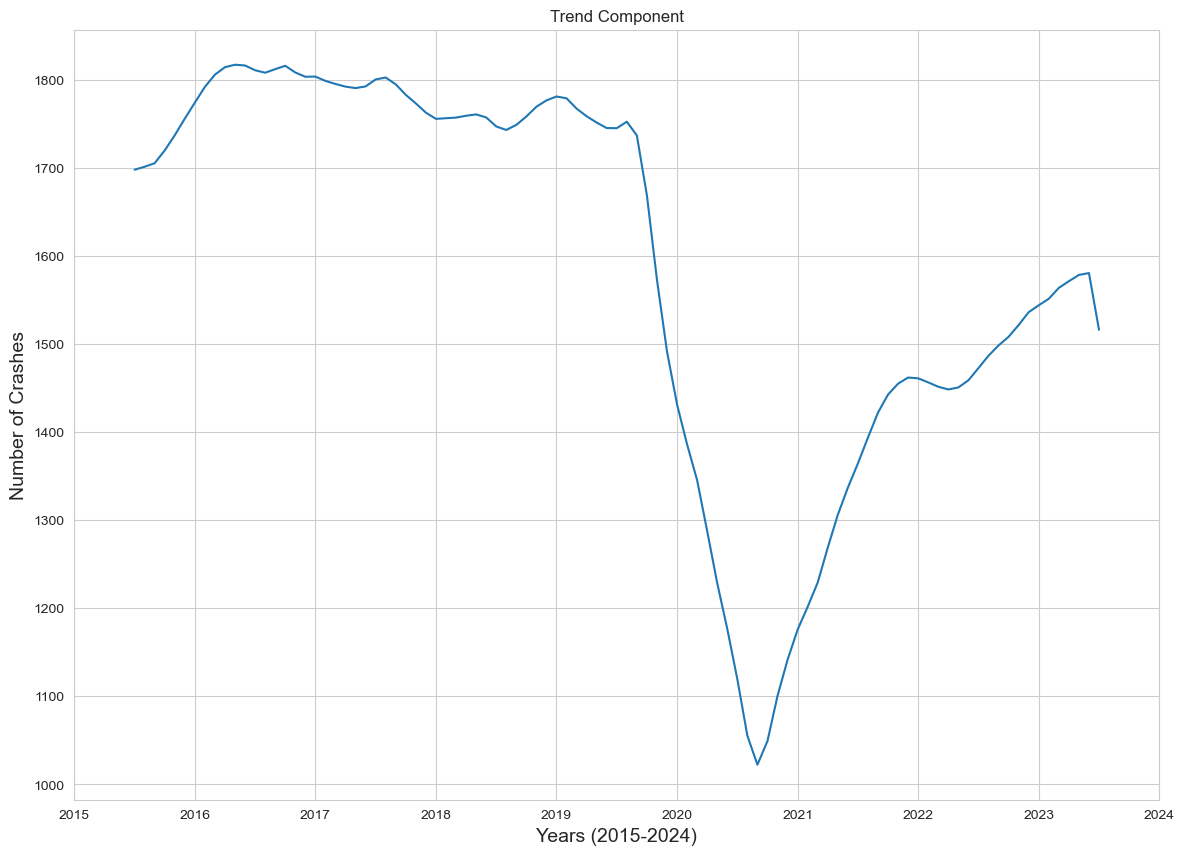

In [96]:
fig,(ax1) = plt.subplots(figsize=(14, 10))
# Trend Component: trend in the number of crashes over the years from 2015-2024
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend Component')
ax1.set_ylabel('Number of Crashes', size = 14)
ax1.set_xlabel('Years (2015-2024)', size = 14)

Hypothesis is true, as expected the crashes are about stable from 2015-2019 and there is a dramatic drop in the crashes in the year 2020-2021 and then again the number increases. This is due to the covid pandemic, as people stopped using transporation/cars due to lockdown. As people did not leave their house, there were no crashes. 

Text(0.5, 0, 'Year (2015-2024)')

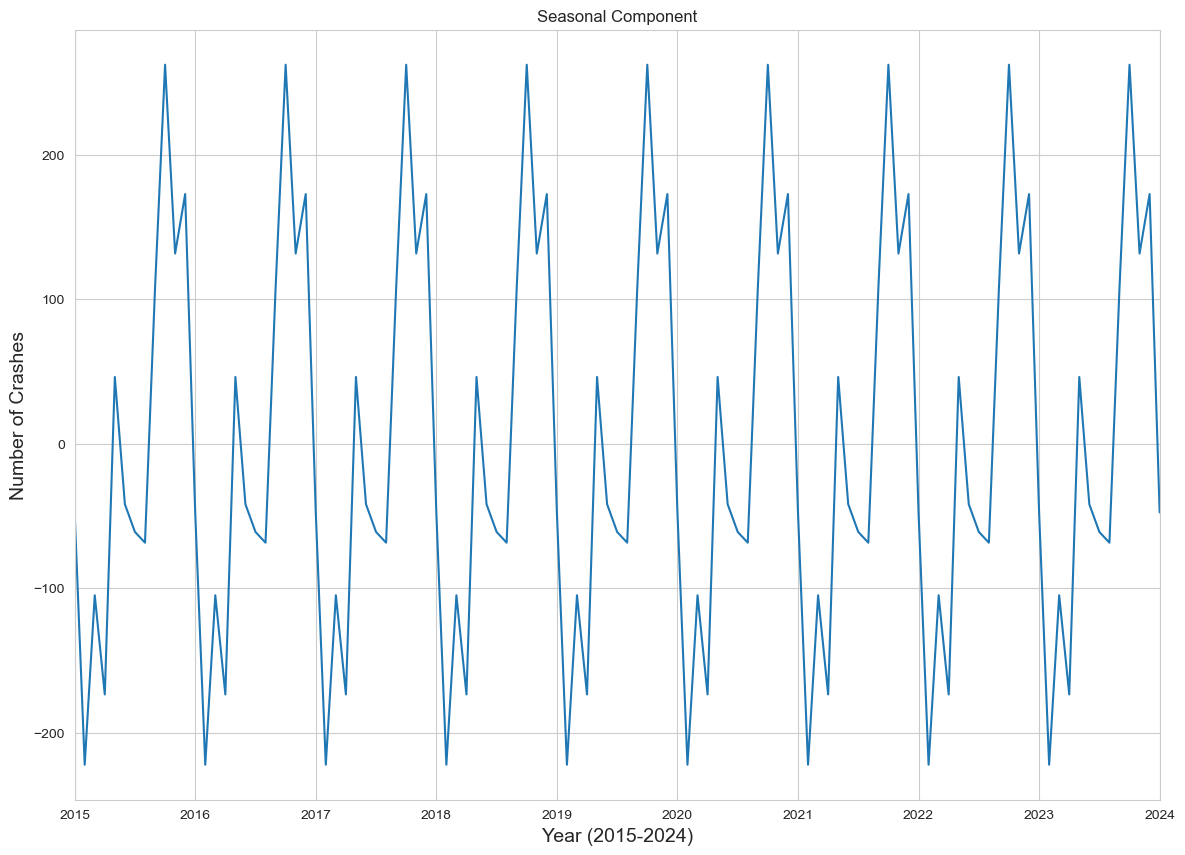

In [97]:
fig, (ax2) = plt.subplots(figsize=(14, 10))
# Seasonal Component: Specific times of the year when crashes are more frequent?
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonal Component')
ax2.set_ylabel('Number of Crashes', size = 14)
ax2.set_xlabel('Year (2015-2024)', size = 14)

From this chart it can be seen that the trend of seasonal crashes are persistant throughout all the years. The crashes go up during holiday season during November - December and then go back down. This is due to many people travelling to different states/cities during the time causing an increase in crashes. 

Text(0.5, 0, 'Year')

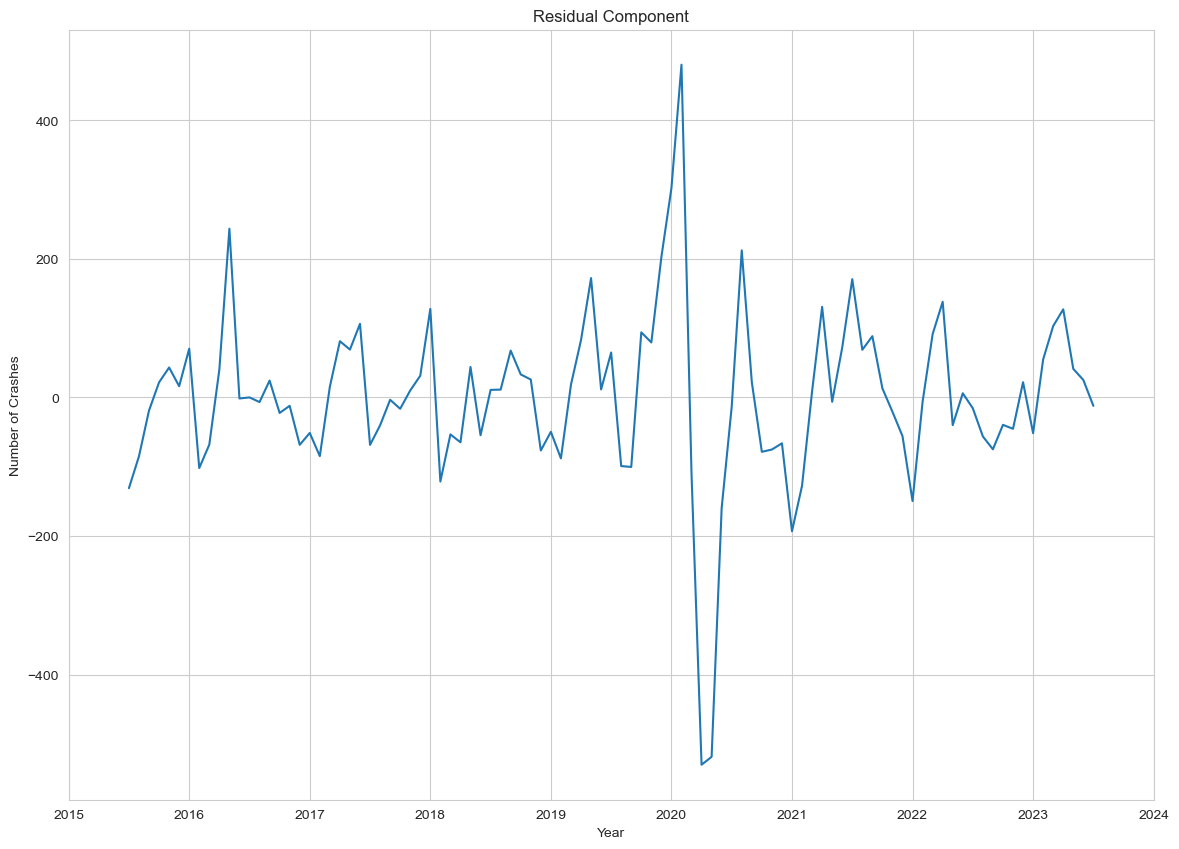

In [98]:
fig, (ax3) = plt.subplots(figsize=(14, 10))
# Residual Component: randomness or noise in the data that cannot be attributed to the trend or seasonal effects
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residual Component')
ax3.set_ylabel('Number of Crashes')
ax3.set_xlabel('Year')

### 5. Have vehicle damage in crashes has decreased over the years?
I hypothesize that the vehicle damage would decrease over the years. 

In [99]:
# Filter the DataFrame for vehicles from the years 2015 to 2020
vehicle_year = df[(df['Vehicle Year'] >= 2015) & (df['Vehicle Year'] <= 2020)]

In [100]:
# Group the filtered data by 'Vehicle Year' and 'Vehicle Damage Extent' and then count the occurrences
damage_extent = vehicle_year.groupby(['Vehicle Year', 'Vehicle Damage Extent']).size().unstack(fill_value=0)

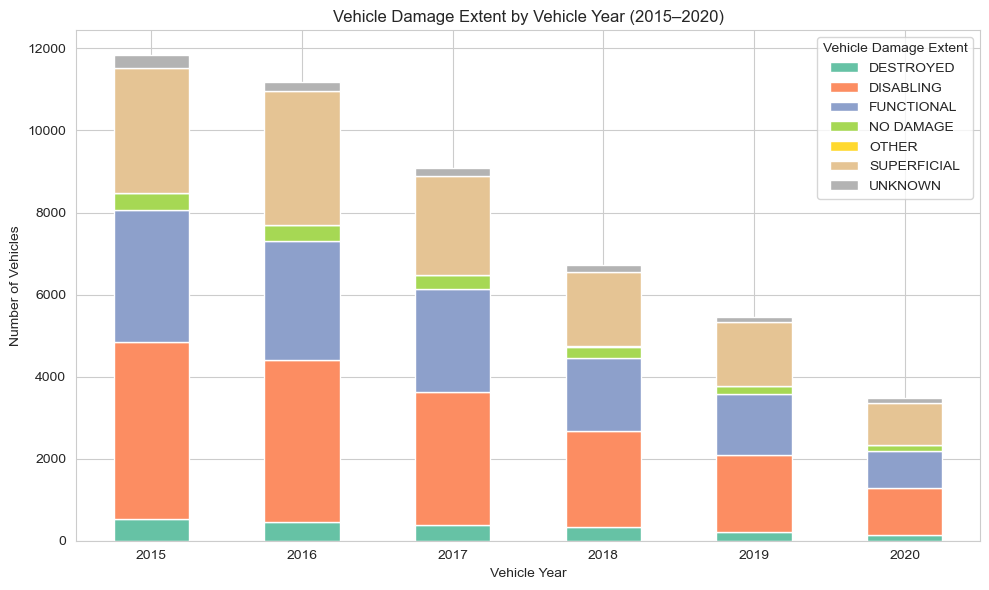

In [101]:
# Plotting the filtered data with a stacked bar chart
damage_extent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Vehicle Damage Extent by Vehicle Year (2015–2020)')
plt.xlabel('Vehicle Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Vehicle Damage Extent')
plt.xticks(rotation=360)
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()

The hypothesis was true that the vehicle damage has decreased over the years, due to improvements in vehicle safety features and crash prevention technology. With smart cars, more safety measures and better automated crash protection, the crashes and vehicle damage due to the crash has decreased. 
However, it can also be seen that most of the damages that have occured have been disabling. 

### 6. Higher number of crashes occur in higher speed limit zones and are  likely to involve vehicles moving at constant speeds.
I hypothesize that higher number of crashes occur in higher speed limit zones and are  likely to involve vehicles moving at constant speeds.?

In [102]:
# Categorizing speed limits for the visualization
speed_limit_bins = [0, 30, 45, 100]  #100 is a placeholder for all speeds above 45
speed_limit_labels = ['0-30 mph', '31-45 mph', '46+ mph']
df['Speed Limit Category'] = pd.cut(df['Speed Limit'], bins=speed_limit_bins, labels=speed_limit_labels, right=False)

In [103]:
# Categorize from current vehicle movements to broader categories
movement_category = {
    'PARKED': 'Stationary',
    'STOPPED IN TRAFFIC LANE': 'Stationary',
    'BACKING': 'Stationary',
    'STARTING FROM LANE': 'Starting/Stopping',
    'STARTING FROM PARKED': 'Starting/Stopping',
    'ACCELERATING': 'Starting/Stopping',
    'SLOWING OR STOPPING': 'Starting/Stopping',
    'MAKING LEFT TURN': 'Turning',
    'MAKING RIGHT TURN': 'Turning',
    'MAKING U TURN': 'Turning',
    'ENTERING TRAFFIC LANE': 'Turning',
    'LEAVING TRAFFIC LANE': 'Turning',
    'NEGOTIATING A CURVE': 'Turning',
    'RIGHT TURN ON RED': 'Turning',
    'MOVING CONSTANT SPEED': 'Constant Motion',
    'CHANGING LANES': 'Constant Motion',
    'OTHER': 'Miscellaneous',
    'UNKNOWN': 'Miscellaneous',
    'PASSING': 'Miscellaneous',
    'DRIVERLESS MOVING VEH.': 'Miscellaneous'
}

In [104]:
# Apply the categorizing to the 'Vehicle Movement' column
df['Simplified Movement'] = df['Vehicle Movement'].replace(movement_category)

In [105]:
simplified_counts = df.groupby(['Speed Limit Category', 'Simplified Movement']).size().unstack(fill_value=0)

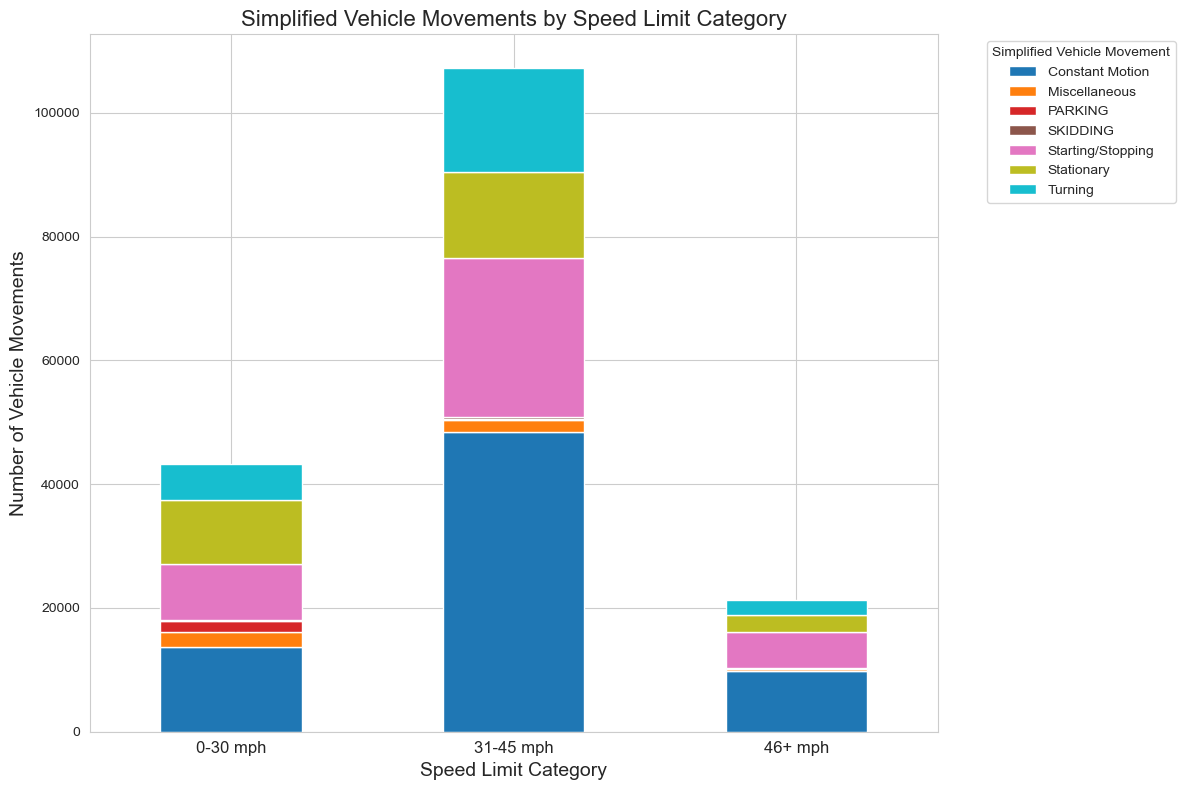

In [106]:
simplified_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap = 'tab10')

# Adding titles and labels
plt.title('Simplified Vehicle Movements by Speed Limit Category', size=16)
plt.xlabel('Speed Limit Category', size=14)
plt.ylabel('Number of Vehicle Movements', size=14)

# Adjusting the legend
plt.legend(title='Simplified Vehicle Movement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=360)
plt.xticks(size = 12)
plt.tight_layout()
plt.show()

Most crashes occur around the speed of 31-45 miles per hour and the vehicle movement is constant motion, this could be because: 
- This speed range is typical forsuburban roads, where there is a higher flow of traffic, increasing the likelihood of collisions.
- Constant motion suggests that the vehicle is not in the process of maneuvering. Drivers in constant motion might be more prone to distractions or complacency

### References: 
- https://www.statsmodels.org/stable/api-structure.html
- https://stackoverflow.com/questions/71896762/need-pandas-groupby-count-or-groupby-size-unstack-to-output-a-dataframe-i-ca
- https://matplotlib.org/stable/users/explain/colors/colormaps.html
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
